In [9]:
from Quantum_functions import *
from Quantum_functionsV2 import *
import qutip as q
from itertools import product
from scipy.special import comb
from math import sqrt
from time import time

## Testing equilibration of spin system to theoretical bound
### Defining system


In [87]:
n= 10
initial_state = tensor([basis(2,0)]*n)
#number of spins

beta0 = lambda n,m: 0

In [88]:
#spin ring
alpha1 = Heisenberg1dRingGen(-1,1,1,n)
H1 = hamiltonian(alpha1,beta0, n)
H1=H1/H1.norm()
assert(H1.isherm)

In [89]:
#random hamiltonian
H2 = make_hermitian(rand_unitary(2**n, dims = H1.dims))
H2= H2/H2.norm()
assert(H2.isherm)

In [90]:
#spin chain
alpha3 = Heisenberg1dChainGen(-1,0,1,n)
H3 = hamiltonian(alpha3,beta0, n)
H3 = H3/H3.norm()
assert(H3.isherm)

### Simulating

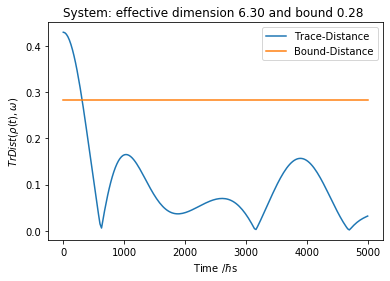

In [85]:
final_t = 5000
steps = 200

equilibration_analyser(H1,initial_state,final_t,steps)

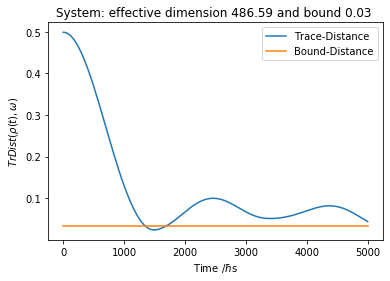

402.0474805831909


In [91]:
s = time()
equilibration_analyser(H2,initial_state,final_t,steps)
e = time()
print(e-s)

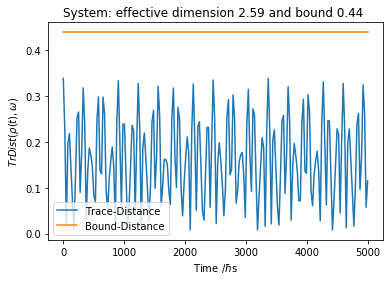

In [61]:

equilibration_analyser(H3,initial_state,final_t,steps)

## Testing Trace distance vs energy distance for eigenstates of a hamiltonian

In [10]:
n = 8
state1 = tensor([basis(2,0)]*n)

alpha1 = Heisenberg1dRingGen(1,1,1,n)
alpha0 = lambda n,m,i,j: 0
beta1 = lambda n,i : [0,0,1][i]
beta0 = lambda n,i :0

self_interaction = hamiltonian(alpha1,beta0,n)
self_interaction = self_interaction/self_interaction.norm()
external_interaction = hamiltonian(alpha0,beta1,n)
external_interaction = external_interaction/external_interaction.norm()


perturbation: Qobj = make_hermitian(rand_unitary(2**n, dims = self_interaction.dims))
perturbation = perturbation/perturbation.norm()
epsilon = 0.3

H1 = epsilon*self_interaction + external_interaction + epsilon**2*perturbation
H2 = external_interaction
H3 = external_interaction + epsilon*perturbation

### Examining with no pertubation

In [104]:
s= time()
xs,ys = energy_trace_comp_2d(H2,0.3,1)
e = time()
print(e-s)

361it [00:00, 760.22it/s]


0.5027422904968262


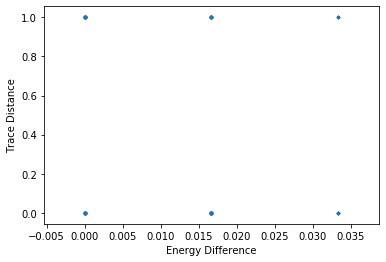

In [105]:
plt.scatter(xs,ys,s=5)
plt.xlabel("Energy Difference")
plt.ylabel("Trace Distance")
plt.show()

#### Examining with pertubation

In [112]:
s= time()
xs,ys = energy_trace_comp_2d(H3,0.3,1)
e = time()
print(e-s)

5776it [01:55, 50.14it/s]


115.35184931755066


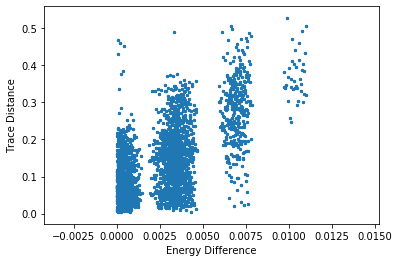

In [113]:
plt.scatter(xs,ys,s=5)
plt.xlabel("Energy Difference")
plt.ylabel("Trace Distance")
plt.show()

#### Examining with pertubation and interaction terms, tracing onto 1 Spin

In [ ]:
xs,ys = energy_trace_comp_2d(H1,0.3,1)

In [ ]:
plt.scatter(xs,ys,s=5)
plt.xlabel("Energy Difference")
plt.ylabel("Trace Distance")
plt.show()

### Examining with pertubation and interaction terms, tracing onto 2 spins 

In [ ]:
xs,ys = energy_trace_comp_2d(H1,0.3,2)

In [ ]:
plt.scatter(xs,ys,s=5)
plt.xlabel("Energy Difference")
plt.ylabel("Trace Distance")
plt.show()

### Explicity examining eigenvalues of an external interaction Hamiltonian

In [ ]:
from qutip import sigmaz
sigz = sigmaz()
num_energies = []
num_states = []

N = 2
H = [hamiltonian_spin_on_site_component(1,i,2,N) for i in range(N)]
H2 = sum(H)



energies,states = H2.eigenstates()

unique_energies = set(energies)
n_energies, n_states = len(unique_energies),len(states)

differences = [abs(e1-e2) for e1,e2 in product(unique_energies,unique_energies)]
unique_differences = set(differences)
                           
n_differences = len(unique_differences)
                           
print(n_states)
print(len(energies))
print(n_energies)
print(n_differences)                         
print(energies)
    




### Explicitly examining eigenstates and result of tracing over them

In [ ]:
from qutip.states import ket2dm,basis
for state in states:
    print(state,ket2dm(state).ptrace(1))
    print("-------------------------")
    
# note | 00 > = (1,0,0,0) not direct like (0,0)!


### Examining Eigenstates grouping with and without pertubation

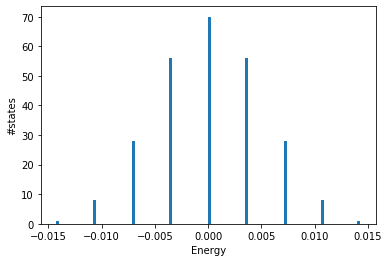

In [3]:
#without
plt.hist(H2.eigenenergies(), bins=100)
plt.xlabel("Energy")
plt.ylabel("#states")
plt.show()

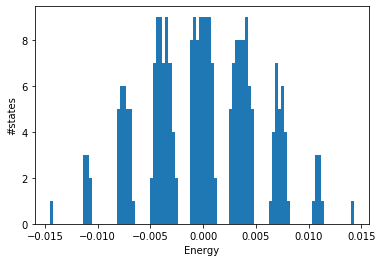

In [4]:
#with
plt.hist(H3.eigenenergies(),bins=100)
plt.xlabel("Energy")
plt.ylabel("#states")
plt.show()

### Picking out specifically the 0 Band

In [5]:
zero_band_energies  = list(filter(lambda val: -0.002<val<0.002 ,H3.eigenenergies()))

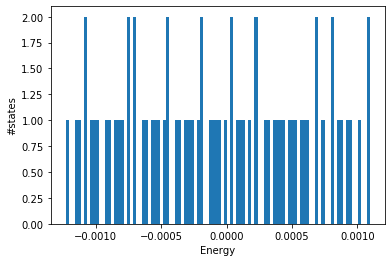

In [6]:
plt.hist(zero_band_energies,bins=100)
plt.xlabel("Energy")
plt.ylabel("#states")
plt.show()

In [7]:
energies,states = H3.eigenstates()
energy_state = zip(energies,states)
energy_state = list(energy_state)
zero_energy_states = list((filter(lambda val: -0.002<val[0]<0.002, energy_state)))
print(len(zero_energy_states))

70


In [8]:
difference = 0
count = 0


for state1,state2 in tqdm(product(zero_energy_states,zero_energy_states)):
    if state1!=state2:
        difference+=tracedist(state1[1].ptrace(0),state2[1].ptrace(0))
        count+=1
        
print(difference/count)


4900it [01:26, 56.63it/s]


0.07390399712330753


### ANALYTICAL BOUND 
##### \begin{equation} d_s\sqrt{\frac{2^{n_s+1}}{d_R}-\frac{2^{n_b+1}}{d_R^2-1}}\end{equation}
##### Value of 0.47 for this system 

### Trying out bigger system 

In [2]:
n = 9
state1 = tensor([basis(2,0)]*n)

alpha1 = Heisenberg1dRingGen(1,1,1,n)
alpha0 = lambda n,m,i,j: 0
beta1 = lambda n,i : [0,0,1][i]
beta0 = lambda n,i :0

self_interaction = hamiltonian(alpha1,beta0,n)
self_interaction = self_interaction/self_interaction.norm()
external_interaction = hamiltonian(alpha0,beta1,n)
external_interaction = external_interaction/external_interaction.norm()


perturbation: Qobj = make_hermitian(rand_unitary(2**n, dims = self_interaction.dims))
perturbation = perturbation/perturbation.norm()
epsilon = 0.1

H1 = epsilon*self_interaction + external_interaction + epsilon**2*perturbation
H2 = external_interaction
H3 = external_interaction + epsilon*perturbation
H4 = external_interaction + epsilon*self_interaction

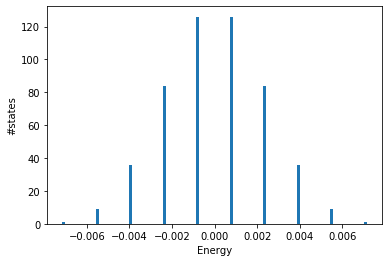

In [10]:
#without
plt.hist(H2.eigenenergies(), bins=100)
plt.xlabel("Energy")
plt.ylabel("#states")
plt.show()

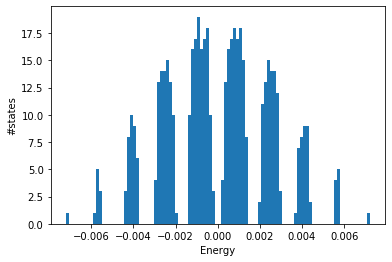

In [11]:
#with
plt.hist(H3.eigenenergies(),bins=100)
plt.xlabel("Energy")
plt.ylabel("#states")
plt.show()

In [12]:
zero_band_energies  = list(filter(lambda val: 0<val<0.0015 ,H3.eigenenergies()))

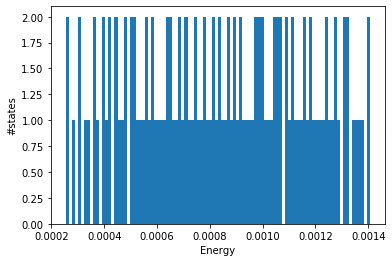

In [13]:
plt.hist(zero_band_energies,bins=100)
plt.xlabel("Energy")
plt.ylabel("#states")
plt.show()

In [14]:
energies,states = H3.eigenstates()
energy_state = zip(energies,states)
energy_state = list(energy_state)
zero_energy_states = list((filter(lambda val: 0<val[0]<0.0015, energy_state)))
print(len(zero_energy_states))

126


In [15]:
difference = 0
count = 0


for state1,state2 in tqdm(product(zero_energy_states,zero_energy_states)):
    if state1!=state2:
        difference+=tracedist(state1[1].ptrace(0),state2[1].ptrace(0))
        count+=1
        
print(difference/count)

15876it [20:36, 12.84it/s]


0.04922828914422023


##### Calculating explicit Analytical value not bounded 

In [18]:
#Exact value of distance without bounding

def bound(nb,ns,n0):
    n = nb+ns
    d = comb(n,n0)
    beta = 2/(d**2-1)
    alpha = beta * -1/d
    lhsum = sum([comb(nb,n0-x)**2*comb(ns,x) for x in range(min(ns,n0)+1)])
    rhsum  = sum([comb(nb,n0-x)*comb(ns,x)**2 for x in range(min(ns,n0)+1)])
    return 2**ns*sqrt(alpha*lhsum+ beta*rhsum) #BRING INSIDE!!

In [19]:
print(bound(8,1,4))
print(bound(9,1,5))
#ANALYTICAL FIX STUFF LIKE DS AND NOT DOING THE -1 thing then recalcuatle TODOD

0.17707648203513293
0.12598914965170924


### Plotting Energy level diagram

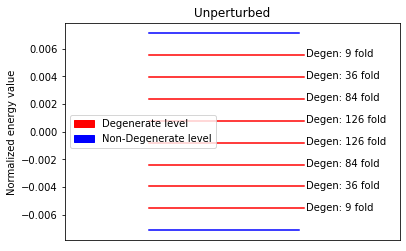

In [3]:
energy_band_plot(H2, "Unperturbed")

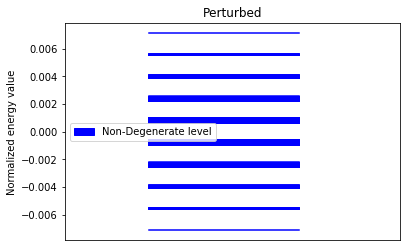

In [4]:
energy_band_plot(H3, "Perturbed")

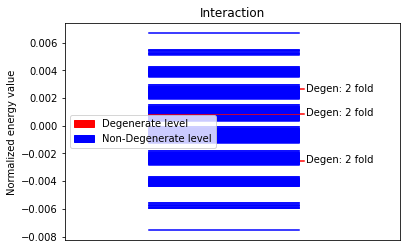

In [5]:
energy_band_plot(H4, "Interaction")

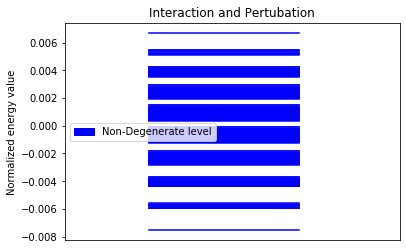

In [6]:
energy_band_plot(H1, "Interaction and Pertubation")